In [1]:
from fastai.text import *
from fastai.docs import download_wt103_model
from pathlib import Path
import html
import re
import dill as pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
PATH = Path('/data2/translate')
TMP_PATH = PATH/'tmp'
TMP_PATH.mkdir(exist_ok=True)
fname='giga-fren.release2.fixed'
en_fname=PATH/f'{fname}.en'
fr_fname=PATH/f'{fname}.fr'

In [3]:
re_eq = re.compile('^(Wh[^?.!]+\?)')
re_fq = re.compile('^([^?.!]+\?)')
lines = ((re_eq.search(eq), re_fq.search(fq))
         for eq, fq in zip(open(en_fname, encoding='utf-8'), open(fr_fname, encoding='utf-8')))
qs = [(e.group(), f.group()) for e, f in lines if e and f]

In [6]:
pickle.dump(qs, (PATH/'fr-en-qs.pkl').open('wb'))

In [7]:
qs = pickle.load((PATH/'fr-en-qs.pkl').open('rb'))

In [8]:
qs[:5], len(qs)

([('What is light ?', 'Qu’est-ce que la lumière?'),
  ('Who are we?', 'Où sommes-nous?'),
  ('Where did we come from?', "D'où venons-nous?"),
  ('What would we do without it?', 'Que ferions-nous sans elle ?'),
  ('What is the absolute location (latitude and longitude) of Badger, Newfoundland and Labrador?',
   'Quelle sont les coordonnées (latitude et longitude) de Badger, à Terre-Neuve-etLabrador?')],
 52331)

In [9]:
en_qs, fr_qs = zip(*qs)

### Load pretrained language models
Here is where I introduce the ulmfit components of this task. I'll load the `en_qs` into the `wt103` tokenizer built by Jeremy Howard, and the `fr_qs` into the `french-wiki-lm` tokenizer that I built myself. First, I'll save both `en_qs` and `fr_qs` into different pandas dataframes, adding spurious label columns because these are language models we're fine-tuning.

In [23]:
en_qs_trn, en_qs_val = train_test_split(en_qs, test_size=0.1)
en_df_trn = pd.DataFrame({'labels': [0]*len(en_qs_trn), 'text': en_qs_trn})
en_df_val = pd.DataFrame({'labels': [0]*len(en_qs_val), 'text': en_qs_val})

In [14]:
en_df

,labels,text
0,0,What is light ?
1,0,Who are we?
2,0,Where did we come from?
3,0,What would we do without it?
4,0,What is the absolute location (latitude and lo...
5,0,What is the major aboriginal group on Vancouve...
6,0,What are the advantages and disadvantages of u...
7,0,What types of land cover are associated with t...
8,0,What is the population of Canada?
9,0,Which province is the most populated?


In [24]:
en_df_trn.to_csv(PATH/'train_en_qs.csv', header=None, index=False)
en_df_val.to_csv(PATH/'valid_en_qs.csv', header=None, index=False)

In [16]:
fr_df = pd.DataFrame({'labels': [0]*len(fr_qs), 'text': fr_qs})

In [25]:
fr_qs_trn, fr_qs_val = train_test_split(fr_qs, test_size=0.1)
fr_df_trn = pd.DataFrame({'labels': [0]*len(fr_qs_trn), 'text': fr_qs_trn})
fr_df_val = pd.DataFrame({'labels': [0]*len(fr_qs_val), 'text': fr_qs_val})

In [17]:
fr_df

,labels,text
0,0,Qu’est-ce que la lumière?
1,0,Où sommes-nous?
2,0,D'où venons-nous?
3,0,Que ferions-nous sans elle ?
4,0,Quelle sont les coordonnées (latitude et longi...
5,0,Quel est le groupe autochtone principal sur l’...
6,0,Quels sont les avantages et les désavantages d...
7,0,À quel type de couverture des terres associez-...
8,0,Quelle est la population du Canada ?
9,0,Quelle est la province la plus peuplée ?


In [26]:
fr_df_trn.to_csv(PATH/'train_fr_qs.csv', header=None, index=False)
fr_df_val.to_csv(PATH/'valid_fr_qs.csv', header=None, index=False)

In [3]:
en_lm_data = text_data_from_csv(PATH, train='train_en_qs', valid='valid_en_qs', data_func=lm_data)

Tokenizing train_en_qs.


Numericalizing train_en_qs.
Numericalizing valid_en_qs.


In [11]:
fr_lm_data = text_data_from_csv(PATH, tokenizer=Tokenizer(lang='fr'), train='train_fr_qs', valid='valid_fr_qs', data_func=lm_data)

Tokenizing train_fr_qs.


Numericalizing train_fr_qs.
Tokenizing valid_fr_qs.


Numericalizing valid_fr_qs.


In [35]:
download_wt103_model()

In [38]:
??download_wt103_model

In [42]:
from fastai.docs import IMDB_PATH

In [43]:
IMDB_PATH

PosixPath('../data/imdb_sample')

In [44]:
ls {IMDB_PATH}

models/


In [45]:
!pwd

/data2/translate


In [5]:
en_learn = RNNLearner.language_model(en_lm_data, 
                                     pretrained_fnames=['lstm_wt103', 'itos_wt103'],
                                     drop_mult=0.5)

In [12]:
fr_learn = RNNLearner.language_model(fr_lm_data, 
                                     pretrained_fnames=['lstm_frwiki3', 'itos_frwiki3'],
                                     drop_mult=0.5)

In [22]:
en_learn.fit_one_cycle(1, 1e-2)

Total time: 01:05
epoch  train loss  valid loss  accuracy
0      3.431419    3.104358    0.468302  (01:05)



In [23]:
en_learn.unfreeze()
en_learn.fit_one_cycle(5, 1e-3)

Total time: 06:59
epoch  train loss  valid loss  accuracy
0      3.115539    2.939070    0.482752  (01:22)
1      2.979595    2.843096    0.493146  (01:24)
2      2.849743    2.779877    0.499743  (01:23)
3      2.777236    2.748542    0.503909  (01:24)
4      2.740930    2.747390    0.503783  (01:24)



In [24]:
en_learn.fit_one_cycle(5, 1e-3)

Total time: 06:59
epoch  train loss  valid loss  accuracy
0      2.740145    2.740065    0.504685  (01:23)
1      2.687399    2.710938    0.508004  (01:22)
2      2.602028    2.687391    0.511009  (01:23)
3      2.567474    2.667275    0.514133  (01:25)
4      2.507713    2.671771    0.513954  (01:23)



In [51]:
en_learn.save_encoder('en_qs_ft_enc')

In [13]:
fr_learn.fit_one_cycle(1, 1e-2)

Total time: 01:19
epoch  train loss  valid loss  accuracy
0      2.974157    2.755210    0.453115  (01:19)



In [14]:
fr_learn.unfreeze()
fr_learn.fit_one_cycle(5, 1e-3)

Total time: 08:27
epoch  train loss  valid loss  accuracy
0      2.731422    2.640202    0.468633  (01:40)
1      2.587715    2.550787    0.480116  (01:42)
2      2.422324    2.497441    0.486201  (01:42)
3      2.300161    2.463465    0.491608  (01:41)
4      2.237393    2.467408    0.492350  (01:40)



In [15]:
fr_learn.save('fr_qs_ft1')

In [17]:
fr_learn.save_encoder('fr_qs_ft1_enc')

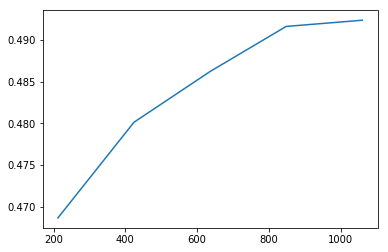

In [18]:
fr_learn.recorder.plot_metrics()

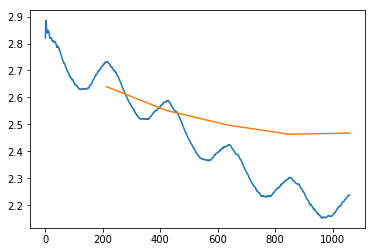

In [19]:
fr_learn.recorder.plot_losses()

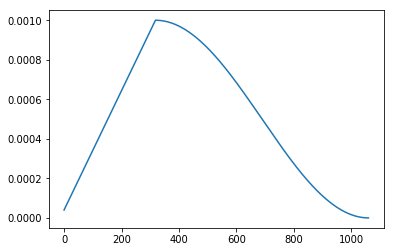

In [28]:
fr_learn.recorder.plot_lr()

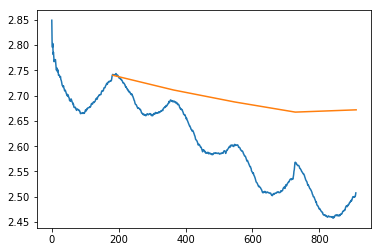

In [25]:
en_learn.recorder.plot_losses()

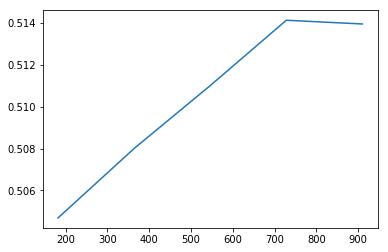

In [26]:
en_learn.recorder.plot_metrics()

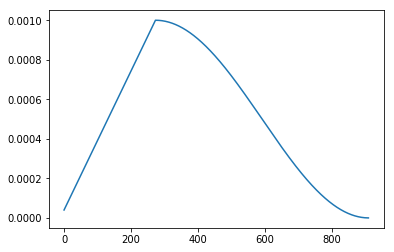

In [27]:
en_learn.recorder.plot_lr()

In [52]:
import numpy as np
frlen_98 = int(np.percentile([len(o) for o in fr_learn.data.train_dl.dl.dataset.ids], 98))

In [53]:
enlen_99 = int(np.percentile([len(o) for o in en_learn.data.train_dl.dl.dataset.ids], 99))

In [54]:
frlen_98, enlen_99

(47, 45)

In [55]:
en_learn.save('en_qs_ft1')

In [56]:
en_learn.save_encoder('en_qs_ft1_enc')